In [6]:
import seaborn as sns
import pandas as pd
import glob

sns.set_theme(context='paper', style='whitegrid', palette="Greys_r", font_scale=2)

  experiment                task          config                  timestamp   
2   baseline             gateway  medium-80s-r10  2023-05-19 14:07:00+00:00  \
3   baseline          get-hotels  medium-80s-r10  2023-05-19 14:07:00+00:00   
1   baseline               login  medium-80s-r10  2023-05-19 14:07:00+00:00   
5   baseline  recommend-location  medium-80s-r10  2023-05-19 14:07:00+00:00   
4   baseline             reserve  medium-80s-r10  2023-05-19 14:07:00+00:00   

         avg           sum     max        p01        p10        p50   
2  34.193293  25644.969998  637.66  16.661145  18.587254  22.570480  \
3   7.781155   3369.240000   99.22   4.228552   4.701160   5.620727   
1   8.719259    706.260000   96.78   3.446116   4.024826   4.890434   
5  10.280610    843.010000   97.90   4.253881   4.678154   5.661776   
4  14.345278   1032.860000  115.46   7.133861   7.497870   8.854459   

         p90         p99                                           filename  
2  30.792657  478.82

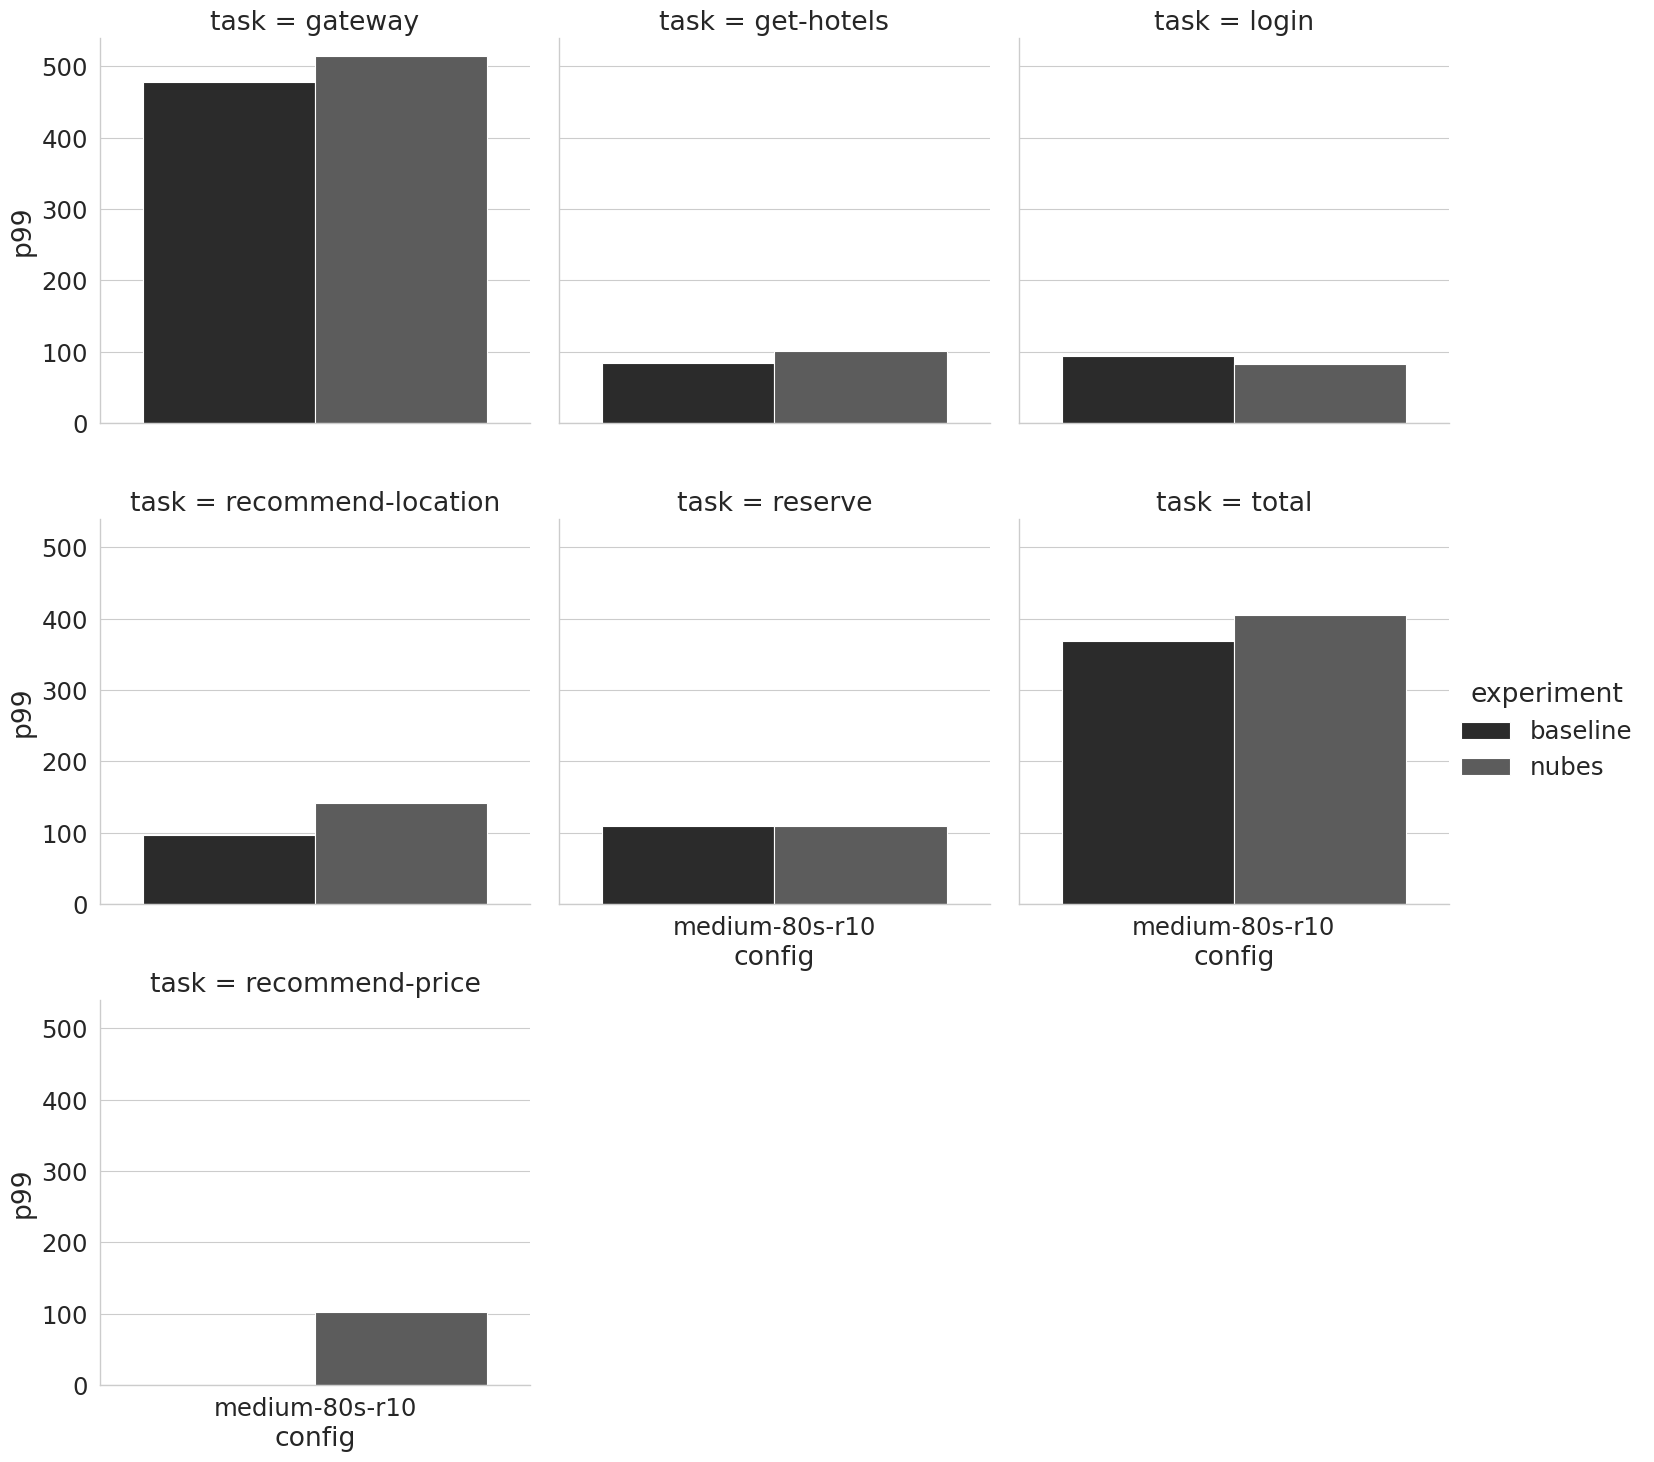

In [7]:
config="medium-80s-*"
experiment="*"
metric="duration"
statistic="p99"

g = f"result/{experiment}/*-{config}-{metric}.csv"

# Create an empty list to store individual dataframes
dataframes = []

# Iterate over each CSV file using glob
for file in glob.glob(g):
    # Read the CSV file into a dataframe
    df = pd.read_csv(file)
    # Add a new column with the filename
    df['filename'] = file

    df = df.iloc[-2:-1]

    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all dataframes into a single dataframe
df = pd.concat(dataframes, ignore_index=True)
df = df.sort_values(["experiment", "task"])

print(df.head())
sns.catplot(data=df, x="config", y=statistic, col="task", col_wrap=3, hue="experiment", kind="bar")

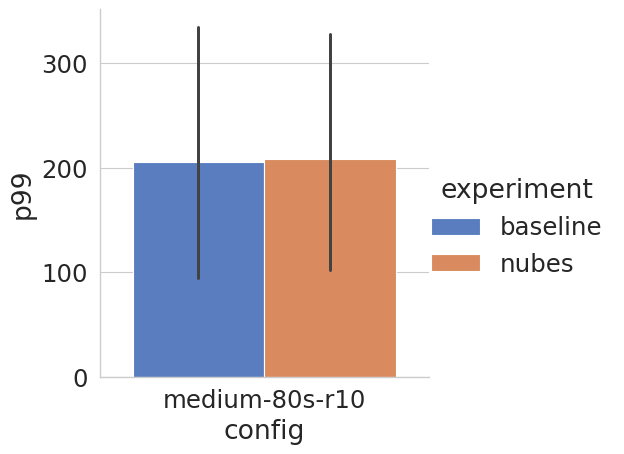

In [8]:
sns.catplot(data=df, x="config", y="p99", hue="experiment", kind="bar", palette="muted")


In [9]:
def get_data(experiment, config, metric, stat):
    # Define the path to the CSV files
    csv_path = f'result/{experiment}-{config}-{metric}.csv'

    # Create an empty list to store individual dataframes
    dataframes = []

    # Iterate over each CSV file using glob
    for file in glob.glob(csv_path):
        # Read the CSV file into a dataframe
        df = pd.read_csv(file)
        # Add a new column with the filename
        df['filename'] = file

        # Append the dataframe to the list
        dataframes.append(df)

    # Concatenate all dataframes into a single dataframe
    return pd.concat(dataframes, ignore_index=True)


def make_plot(experiment, config, metric, stat):
    df = get_data(experiment, config, metric, stat)
    sns.catplot(data=df, y=stat, x="experiment", kind="boxen")

In [10]:
make_plot("*", "medium-150s-r10", "duration", "avg")

ValueError: No objects to concatenate

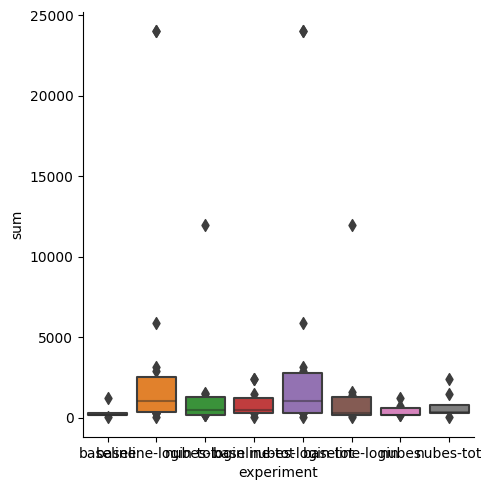

In [ ]:
make_plot("*", "medium-150s-r10", "invocations", "sum")